# Imports and Reading data into the notebook

In [339]:
import pandas as pd
import scipy as sc
import scipy.io as sio
import numpy as np
import math
from numpy import *

In [340]:
my_path = '/Users/boyu.loo/Desktop/hotel.csv'
my_df = pd.read_csv(my_path)
print(my_df.shape)
my_df.head(2)

(7504, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245


In [341]:
my_df.columns

Index(['Hotelid', 'userid', 'reviewtext', 'Date', 'NoOfReaders',
       'HelpfulToNoOfreaders', 'Value_rating', 'Rooms_rating',
       'Location_rating', 'Cleanliness_rating', 'Checkin_rating',
       'Service_rating', 'Businessservice_rating',
       'AverageOverallRatingOfHotel', 'AveragePricing'],
      dtype='object')

In [342]:
my_df['Hotelid'].describe()

count          7504
unique           75
top       hotel_188
freq            703
Name: Hotelid, dtype: object

In [343]:
my_df['userid'].describe()

count           7504
unique          7313
top       hotel_4370
freq               4
Name: userid, dtype: object

In [344]:
my_df['reviewtext'].describe()

count                                                  7504
unique                                                 7504
top       Comfy and clean. Stayed with wife and 2 teenag...
freq                                                      1
Name: reviewtext, dtype: object

# Data pre-process

In [345]:
'''Clean and imputing missing data'''
my_df.isnull().sum()

Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
dtype: int64

No missing values.

2.Delete lines with duplicate text

In [346]:
my_df['reviewtext'].describe()

count                                                  7504
unique                                                 7504
top       Comfy and clean. Stayed with wife and 2 teenag...
freq                                                      1
Name: reviewtext, dtype: object

In [347]:
mydf_train_1 = my_df

In [348]:
'''Drop unnecessary columns'''
mydf_train_1 = mydf_train_1.drop("Hotelid", axis = 1)
mydf_train_1 = mydf_train_1.drop("userid", axis = 1)
mydf_train_1 = mydf_train_1.drop("reviewtext", axis = 1)
mydf_train_1 = mydf_train_1.drop("Date", axis = 1)
mydf_train_1 = mydf_train_1.drop("NoOfReaders", axis = 1)
mydf_train_1 = mydf_train_1.drop("HelpfulToNoOfreaders", axis = 1)
mydf_train_1 = mydf_train_1.drop("AveragePricing", axis = 1)
mydf_train_1 = mydf_train_1.drop("AverageOverallRatingOfHotel", axis = 1)
print(mydf_train_1.shape)

(7504, 7)


In [349]:
'''Because the rating range is between 0-6, we drop data with rating more than 6'''
def func_for(mydf_train_cur):
    for index in mydf_train_cur.index:
        if mydf_train_cur.loc[index, 'Value_rating'] > 6:
            mydf_train_cur.loc[index, 'Value_rating'] *= 0
        if mydf_train_cur.loc[index, 'Rooms_rating'] > 6:
            mydf_train_cur.loc[index, 'Rooms_rating'] *= 0
        if mydf_train_cur.loc[index, 'Location_rating'] > 6:
            mydf_train_cur.loc[index, 'Location_rating'] *= 0
        if mydf_train_cur.loc[index, 'Cleanliness_rating'] > 6:
            mydf_train_cur.loc[index, 'Cleanliness_rating'] *= 0
        if mydf_train_cur.loc[index, 'Checkin_rating'] > 6:
            mydf_train_cur.loc[index, 'Checkin_rating'] *= 0
        if mydf_train_cur.loc[index, 'Service_rating'] > 6:
            mydf_train_cur.loc[index, 'Service_rating'] *= 0
        if mydf_train_cur.loc[index, 'Businessservice_rating'] > 6:
            mydf_train_cur.loc[index, 'Businessservice_rating'] *= 0
    return mydf_train_cur

mydf_train_cur = func_for(mydf_train_1)
print(mydf_train_cur)


      Value_rating  Rooms_rating  Location_rating  Cleanliness_rating  \
0                4             4                1                   4   
1                2             4                3                   3   
2                2             4                3                   4   
3                5             5                6                   6   
4                5             6                6                   6   
...            ...           ...              ...                 ...   
7499             5             6                6                   6   
7500             4             5                5                   4   
7501             6             6                6                   6   
7502             6             5                5                   6   
7503             5             5                5                   6   

      Checkin_rating  Service_rating  Businessservice_rating  
0                  4               4                       3

In [350]:
'''To keep data reasonalbe, we drop all the ratings below 1 but the Average Overall rating above 0'''
def func(mydf):
    for index in mydf.index:
        if mydf.loc[index,'Value_rating'] < 1 and mydf.loc[index,' Rooms_rating'] < 1 and mydf.loc[index,'Location_rating'] < 1:
            mydf = mydf.drop([index])
        #if mydf.loc[index,'useful'] < 1:
            #mydf = mydf.drop([index])
        #if mydf.loc[index,'funny'] < 1:
           # mydf = mydf.drop([index])
    return mydf

mydf_train_cur = func(mydf_train_1)
print(mydf_train_cur)

      Value_rating  Rooms_rating  Location_rating  Cleanliness_rating  \
0                4             4                1                   4   
1                2             4                3                   3   
2                2             4                3                   4   
3                5             5                6                   6   
4                5             6                6                   6   
...            ...           ...              ...                 ...   
7499             5             6                6                   6   
7500             4             5                5                   4   
7501             6             6                6                   6   
7502             6             5                5                   6   
7503             5             5                5                   6   

      Checkin_rating  Service_rating  Businessservice_rating  
0                  4               4                       3

# Model K-means++

In [351]:
'''Define the function for computing distance of two points'''
def distEclud(pointA, pointB):
    return sqrt(sum(power(pointA - pointB,2)))

In [352]:
'''For each data point, we compute the distance between the point 
   and the nearest center that has already been chosen.'''
def nearest(point, clusterSet):
    min_dist = inf
    m = np.shape(clusterSet)[0]
    for i in range(m):
        d = distEclud(point, clusterSet[i, ])
        if min_dist > d:
            min_dist = d
    return min_dist

In [353]:
'''Choose a new data point at random as a new center, 
   using a weighted probability distribution where a point is chosen with probability proportional to the square. 
   Repeat doing that until we found the cluster centers (3).'''
def getCent(dataSet, k): 
    row, col = np.shape(dataSet)
    centroids = np.zeros((k, col))
    index = np.random.randint(0,row)
    centroids[0,] = dataSet[index, ]
    
    d = [0.0 for _ in range(row)]
    
    for i in range(1,k):
        sum_all = 0
        for j in range(row):
            d[j] = nearest(dataSet[j, ], centroids[0:i, ])
            sum_all += d[j]
        sum_all *= random.rand()
        for j, di in enumerate(d):
            sum_all = sum_all - di
            if sum_all > 0:
                continue
            centroids[i,] = dataSet[j, ]
            break
    return centroids

In [354]:
K = 3
mydf_train_cur['overall_rating'] = 0
dataSet = mydf_train_cur.as_matrix(columns=None)
row = np.shape(dataSet)[0]
centSet = getCent(dataSet, K)
clusterAssment = np.zeros((row,2))
clusterChange = True
while clusterChange:
    clusterChange = False
    for i in range(row):
        minDist = inf
        minIndex = -1;
        for j in range(K):
            distCal = distEclud(centSet[j,:], dataSet[i,:])
            if distCal < minDist:
                minDist = distCal
                minIndex = j
                dataSet[i][7]=j;
        if clusterAssment[i,0] != minIndex: 
            clusterChange = True
        clusterAssment[i,:] = minIndex, minDist**2

    for cent in range(K):
        simpleCluster = dataSet[nonzero(clusterAssment[:,0] == cent)]
        if len(simpleCluster) != 0:
            centSet[cent,:] = mean(simpleCluster, 0)
               


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [355]:
print(dataSet)

[[4 4 1 ... 4 3 2]
 [2 4 3 ... 2 2 1]
 [2 4 3 ... 3 1 2]
 ...
 [6 6 6 ... 6 6 0]
 [6 5 5 ... 5 5 0]
 [5 5 5 ... 6 6 0]]


# Recommondation

In [356]:
np.savetxt('/Users/boyu.loo/Desktop/hotel_rated.csv',dataSet)

In [357]:
my_path = '/Users/boyu.loo/Desktop/hotel_rated.csv'
my_df = pd.read_csv(my_path,sep=' ', header=None, names = ['Value_rating','Rooms_rating','Location_rating','Cleanliness_rating','Checkin_rating','Service_rating','Businessservice_rating','overall_rating'])
print(my_df.shape)
my_df.head()

(7504, 8)


,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,overall_rating
0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,2.0
1,2.0,4.0,3.0,3.0,1.0,2.0,2.0,1.0
2,2.0,4.0,3.0,4.0,2.0,3.0,1.0,2.0
3,5.0,5.0,6.0,6.0,5.0,5.0,3.0,0.0
4,5.0,6.0,6.0,6.0,6.0,1.0,6.0,0.0


In [358]:
path = '/Users/boyu.loo/Desktop/hotel.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(7504, 15)


,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245
2,hotel_101,hotel_8440,I Won't Go Back I stayed at the hotel 11/14/08...,"Nov 18, 2008",0,0,2,4,3,4,2,3,1,3.5,$245
3,hotel_101,hotel_4592,Good weekend stay My wife and I stay here quit...,"Oct 19, 2008",0,0,5,5,6,6,5,5,3,3.5,$245
4,hotel_101,hotel_5901,"Great airport stay Lovely indoor pool area, lo...","Oct 13, 2008",0,0,5,6,6,6,6,1,6,3.5,$245


In [359]:
my_df = my_df.join(df['Hotelid'], how='right')
print(my_df.shape)
my_df.head()

(7504, 9)


,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,overall_rating,Hotelid
0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,2.0,hotel_101
1,2.0,4.0,3.0,3.0,1.0,2.0,2.0,1.0,hotel_101
2,2.0,4.0,3.0,4.0,2.0,3.0,1.0,2.0,hotel_101
3,5.0,5.0,6.0,6.0,5.0,5.0,3.0,0.0,hotel_101
4,5.0,6.0,6.0,6.0,6.0,1.0,6.0,0.0,hotel_101


In [360]:
my_df = my_df.join(df['userid'], how='right')
print(my_df.shape)
my_df.head()

(7504, 10)


,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,overall_rating,Hotelid,userid
0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,2.0,hotel_101,hotel_2225
1,2.0,4.0,3.0,3.0,1.0,2.0,2.0,1.0,hotel_101,hotel_5079
2,2.0,4.0,3.0,4.0,2.0,3.0,1.0,2.0,hotel_101,hotel_8440
3,5.0,5.0,6.0,6.0,5.0,5.0,3.0,0.0,hotel_101,hotel_4592
4,5.0,6.0,6.0,6.0,6.0,1.0,6.0,0.0,hotel_101,hotel_5901


In [361]:
my_df['overall_rating'].mean()

0.9764125799573561

In [362]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7504 entries, 0 to 7503
Data columns (total 10 columns):
Value_rating              7504 non-null float64
Rooms_rating              7504 non-null float64
Location_rating           7504 non-null float64
Cleanliness_rating        7504 non-null float64
Checkin_rating            7504 non-null float64
Service_rating            7504 non-null float64
Businessservice_rating    7504 non-null float64
overall_rating            7504 non-null float64
Hotelid                   7504 non-null object
userid                    7504 non-null object
dtypes: float64(8), object(2)
memory usage: 586.4+ KB


In [363]:
'''Build a data frame that contains the overall_rating and the number of times each hotel was scored 
to calculate the correlation between hotels.
'''
ratings = pd.DataFrame(my_df.groupby('Hotelid')['overall_rating'].mean())
ratings.head()

,overall_rating
Hotelid,
hotel_101,0.800000
hotel_102,1.232558
hotel_103,1.142857
hotel_106,0.828125
hotel_107,0.846154


In [364]:
ratings['number_of_ratings'] = my_df.groupby('Hotelid')['overall_rating'].count()
ratings.head()

,overall_rating,number_of_ratings
Hotelid,,
hotel_101,0.800000,40
hotel_102,1.232558,86
hotel_103,1.142857,56
hotel_106,0.828125,64
hotel_107,0.846154,39


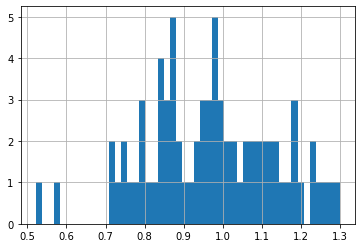

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['overall_rating'].hist(bins=50)

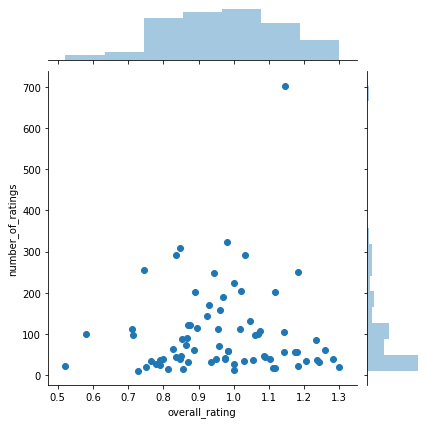

In [366]:
'''The relationship between over_rating and rating times'''
import seaborn as sns
sns.jointplot(x='overall_rating', y='number_of_ratings', data=ratings)

In [367]:
hotel_matrix = my_df.pivot_table(index='userid', columns='Hotelid', values='overall_rating')
hotel_matrix.head()
#Because users do not evaluate every hotel, they will be a null value

Hotelid,hotel_101,hotel_102,hotel_103,hotel_106,hotel_107,hotel_108,hotel_109,hotel_110,hotel_111,hotel_112,...,hotel_185,hotel_186,hotel_188,hotel_190,hotel_191,hotel_192,hotel_193,hotel_195,hotel_198,hotel_200
userid,,,,,,,,,,,,,,,,,,,,,
hotel_10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotel_10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotel_10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotel_10006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotel_10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
ratings.sort_values('number_of_ratings',ascending=False).head()

,overall_rating,number_of_ratings
Hotelid,,
hotel_188,1.145092,703
hotel_152,0.981481,324
hotel_186,0.847896,309
hotel_169,1.030822,292
hotel_182,0.835052,291


In [369]:
hotel_188_rating = hotel_matrix['hotel_188']
hotel_188_rating.head()
hotel_152_rating = hotel_matrix['hotel_152']
hotel_152_rating.head()

userid
hotel_10000   NaN
hotel_10003   NaN
hotel_10005   NaN
hotel_10006   NaN
hotel_10007   NaN
Name: hotel_152, dtype: float64

In [370]:
similar_hotel_188 =hotel_matrix.corrwith(hotel_188_rating)
similar_hotel_188.head()

Hotelid
hotel_101   NaN
hotel_102   NaN
hotel_103   NaN
hotel_106   NaN
hotel_107   NaN
dtype: float64

In [371]:
similar_hotel_152 =hotel_matrix.corrwith(hotel_152_rating)
similar_hotel_152.head()

Hotelid
hotel_101   NaN
hotel_102   NaN
hotel_103   NaN
hotel_106   NaN
hotel_107   NaN
dtype: float64

In [372]:
corr_188 = pd.DataFrame(similar_hotel_188, columns=['Correlation'])
corr_188.dropna(inplace=True)
corr_188.head(1)

,Correlation
Hotelid,
hotel_186,0.0


In [373]:
corr_152 = pd.DataFrame(similar_hotel_152, columns=['Correlation'])
corr_152.dropna(inplace=True)
corr_152.head()

,Correlation
Hotelid,
hotel_135,0.5
hotel_141,0.5
hotel_152,1.0


In [374]:
corr_188 = corr_188.join(ratings['number_of_ratings'])
corr_188.head()

,Correlation,number_of_ratings
Hotelid,,
hotel_186,0.0,309
hotel_188,1.0,703


In [375]:
corr_152 = corr_152.join(ratings['number_of_ratings'])
corr_152 .head()

,Correlation,number_of_ratings
Hotelid,,
hotel_135,0.5,189
hotel_141,0.5,224
hotel_152,1.0,324


In [376]:
corr_152[corr_152['number_of_ratings'] > 200].sort_values(by='Correlation', ascending=False).head()

,Correlation,number_of_ratings
Hotelid,,
hotel_152,1.0,324
hotel_141,0.5,224
